In [90]:
import pandas as pd

In [91]:
# Load CSV file
train = pd.read_csv("/training.csv")
test = pd.read_csv("/training.csv")

In [92]:
train

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,d,55,61,90,75,55,91,84,24,54,...,1.28,-20.84,-1.47,-5.72,-18.73,-1.18,-5.22,-17.81,-1.28,-3.87
194,d,66,69,93,90,63,100,99,25,57,...,-1.50,-19.64,-1.45,-5.60,-17.03,-1.08,-5.15,-16.77,-1.46,-4.03
195,h,79,30,55,115,51,96,109,25,59,...,-3.66,-22.40,-3.91,-6.61,-36.29,-2.13,-5.77,-23.32,-2.09,-4.13
196,h,69,27,53,106,47,90,87,24,55,...,-0.88,-13.32,0.16,-2.39,-7.12,0.02,-2.06,-10.04,-0.74,-2.88


In [102]:
#from sklearn.model_selection import train_test_split
X = train.copy()
y = X.pop('class')
Xt = test.copy()
yt = Xt.pop('class')
# y = dataset['class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


0      d 
1      h 
2      s 
3      s 
4      d 
       ..
193    d 
194    d 
195    h 
196    h 
197    h 
Name: class, Length: 198, dtype: object


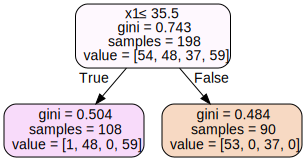

In [94]:
from sklearn import tree
import graphviz
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

In [95]:
yp = clf.predict(Xt)

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(yt, yp)

# Calculate precision
precision = precision_score(yt, yp, average='micro')

# Calculate recall
recall = recall_score(yt, yp, average='micro')

# Calculate F1-score
f1 = f1_score(yt, yp, average='micro')

In [104]:
report = classification_report(yt, yp)
print(report)

              precision    recall  f1-score   support

          d        0.59      0.98      0.74        54
          h        0.00      0.00      0.00        48
          o        0.00      0.00      0.00        37
          s        0.55      1.00      0.71        59

    accuracy                           0.57       198
   macro avg       0.28      0.50      0.36       198
weighted avg       0.32      0.57      0.41       198



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


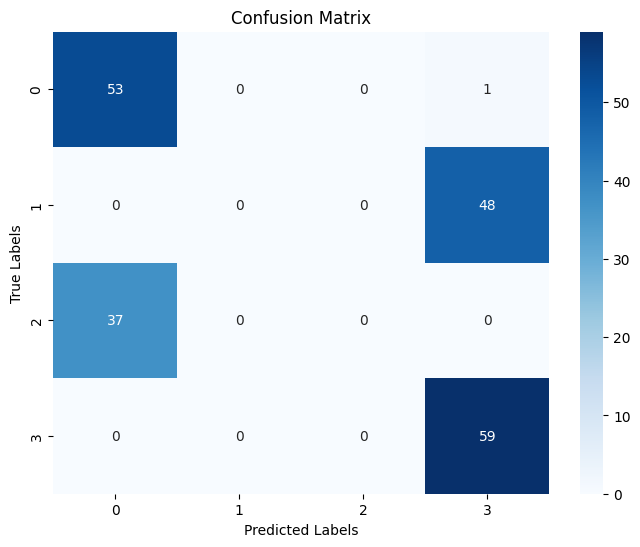

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted labels
y_pred = clf.predict(X)

# Create a confusion matrix
cm = confusion_matrix(y, yp)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

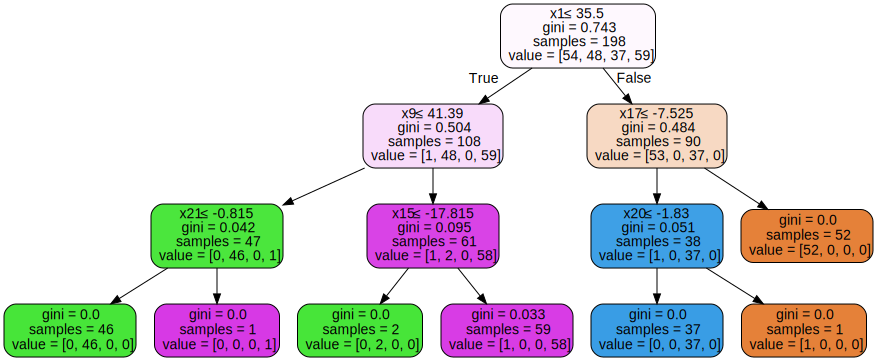

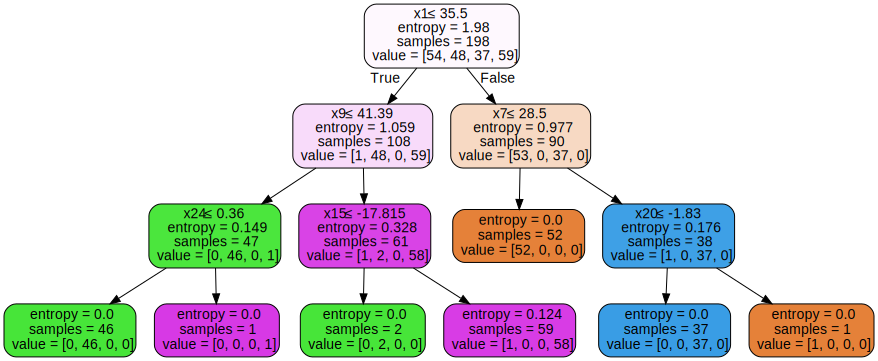

In [42]:
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

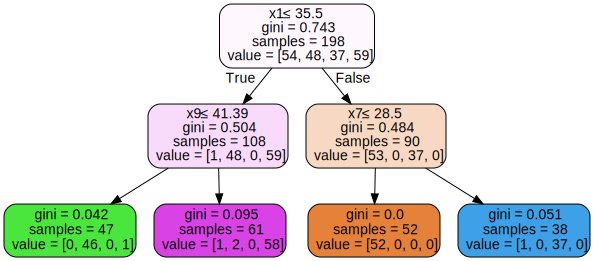

In [44]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

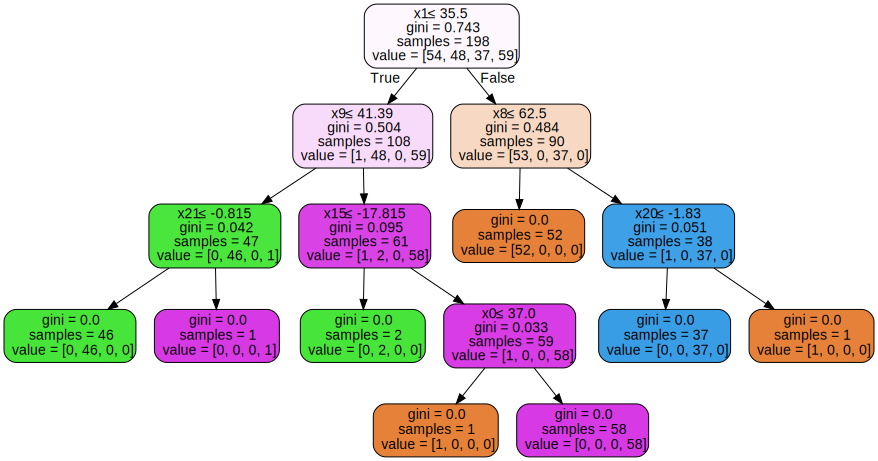

In [49]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

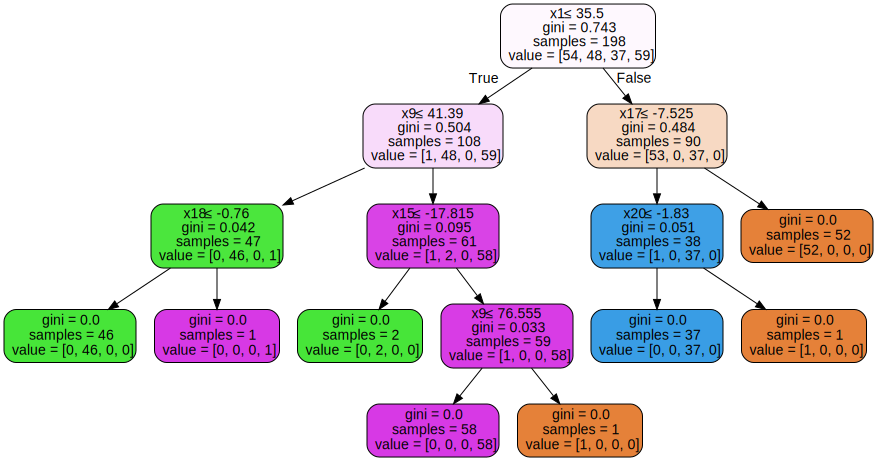

In [48]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Forest Type Mapping', view=True)
graph

In [21]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
predictions = clf.predict(Xt)
predictions

array(['d ', 'h ', 's ', 's ', 'd ', 'h ', 's ', 'd ', 's ', 'o ', 's ',
       'o ', 'o ', 'd ', 's ', 'o ', 'o ', 'd ', 's ', 'h ', 'o ', 'd ',
       's ', 'h ', 'd ', 'h ', 'o ', 'd ', 'd ', 'd ', 'd ', 's ', 'o ',
       's ', 'd ', 'd ', 'd ', 'h ', 'o ', 'd ', 'd ', 'd ', 's ', 's ',
       'h ', 'd ', 'd ', 'o ', 'd ', 's ', 'd ', 's ', 's ', 'h ', 'h ',
       's ', 'o ', 'd ', 'h ', 'h ', 'd ', 'o ', 'o ', 'o ', 'h ', 's ',
       'h ', 'd ', 'd ', 'h ', 'o ', 'o ', 'o ', 's ', 'h ', 's ', 'd ',
       'o ', 's ', 's ', 'd ', 'd ', 'o ', 'h ', 'o ', 'h ', 'd ', 'd ',
       's ', 'o ', 'o ', 'h ', 'o ', 'o ', 'd ', 's ', 'o ', 'h ', 'o ',
       's ', 'd ', 'o ', 'h ', 'h ', 'h ', 'h ', 'h ', 'd ', 's ', 'h ',
       'd ', 'd ', 'd ', 'd ', 'h ', 'o ', 's ', 'h ', 's ', 's ', 's ',
       's ', 'o ', 's ', 'h ', 's ', 'h ', 's ', 'h ', 'd ', 's ', 's ',
       'o ', 's ', 'h ', 's ', 'o ', 's ', 'd ', 's ', 's ', 'h ', 's ',
       'h ', 's ', 'd ', 'd ', 's ', 'h ', 'd ', 's

In [24]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(Xt)

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [1.        , 0.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.        , 0.        , 1.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.01694915, 0.        , 0.        , 0.98305085],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [1.        , 0.        ,

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(yt, predictions)

0.9949494949494949

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yt, predictions, labels=[0,1])

TypeError: '<' not supported between instances of 'int' and 'str'

In [27]:
from sklearn.metrics import precision_score
precision_score(yt, predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [28]:
from sklearn.metrics import recall_score
recall_score(yt, predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [29]:
from sklearn.metrics import classification_report
print(classification_report(yt, predictions, target_names=['malignant', 'benign']))

ValueError: Number of classes, 4, does not match size of target_names, 2. Try specifying the labels parameter

In [30]:
feature_names = X.columns
feature_names

Index(['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')

In [31]:
clf.feature_importances_

array([0.        , 0.33847153, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.32166617,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02620549, 0.        , 0.28675956, 0.        , 0.        ,
       0.01341391, 0.01348333, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [32]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
b2,0.338472
pred_minus_obs_H_b1,0.321666
pred_minus_obs_H_b9,0.286760
pred_minus_obs_H_b7,0.026205
pred_minus_obs_S_b4,0.013483
pred_minus_obs_S_b3,0.013414
b1,0.000000
pred_minus_obs_S_b8,0.000000
pred_minus_obs_S_b7,0.000000
pred_minus_obs_S_b6,0.000000


In [33]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['b2',
 'pred_minus_obs_H_b1',
 'pred_minus_obs_H_b9',
 'pred_minus_obs_H_b7',
 'pred_minus_obs_S_b4',
 'pred_minus_obs_S_b3']

<Axes: >

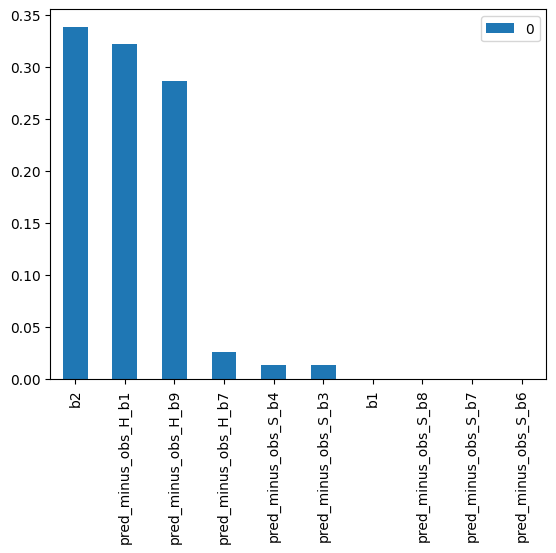

In [34]:
feature_importance.head(10).plot(kind='bar')

KeyError: 3

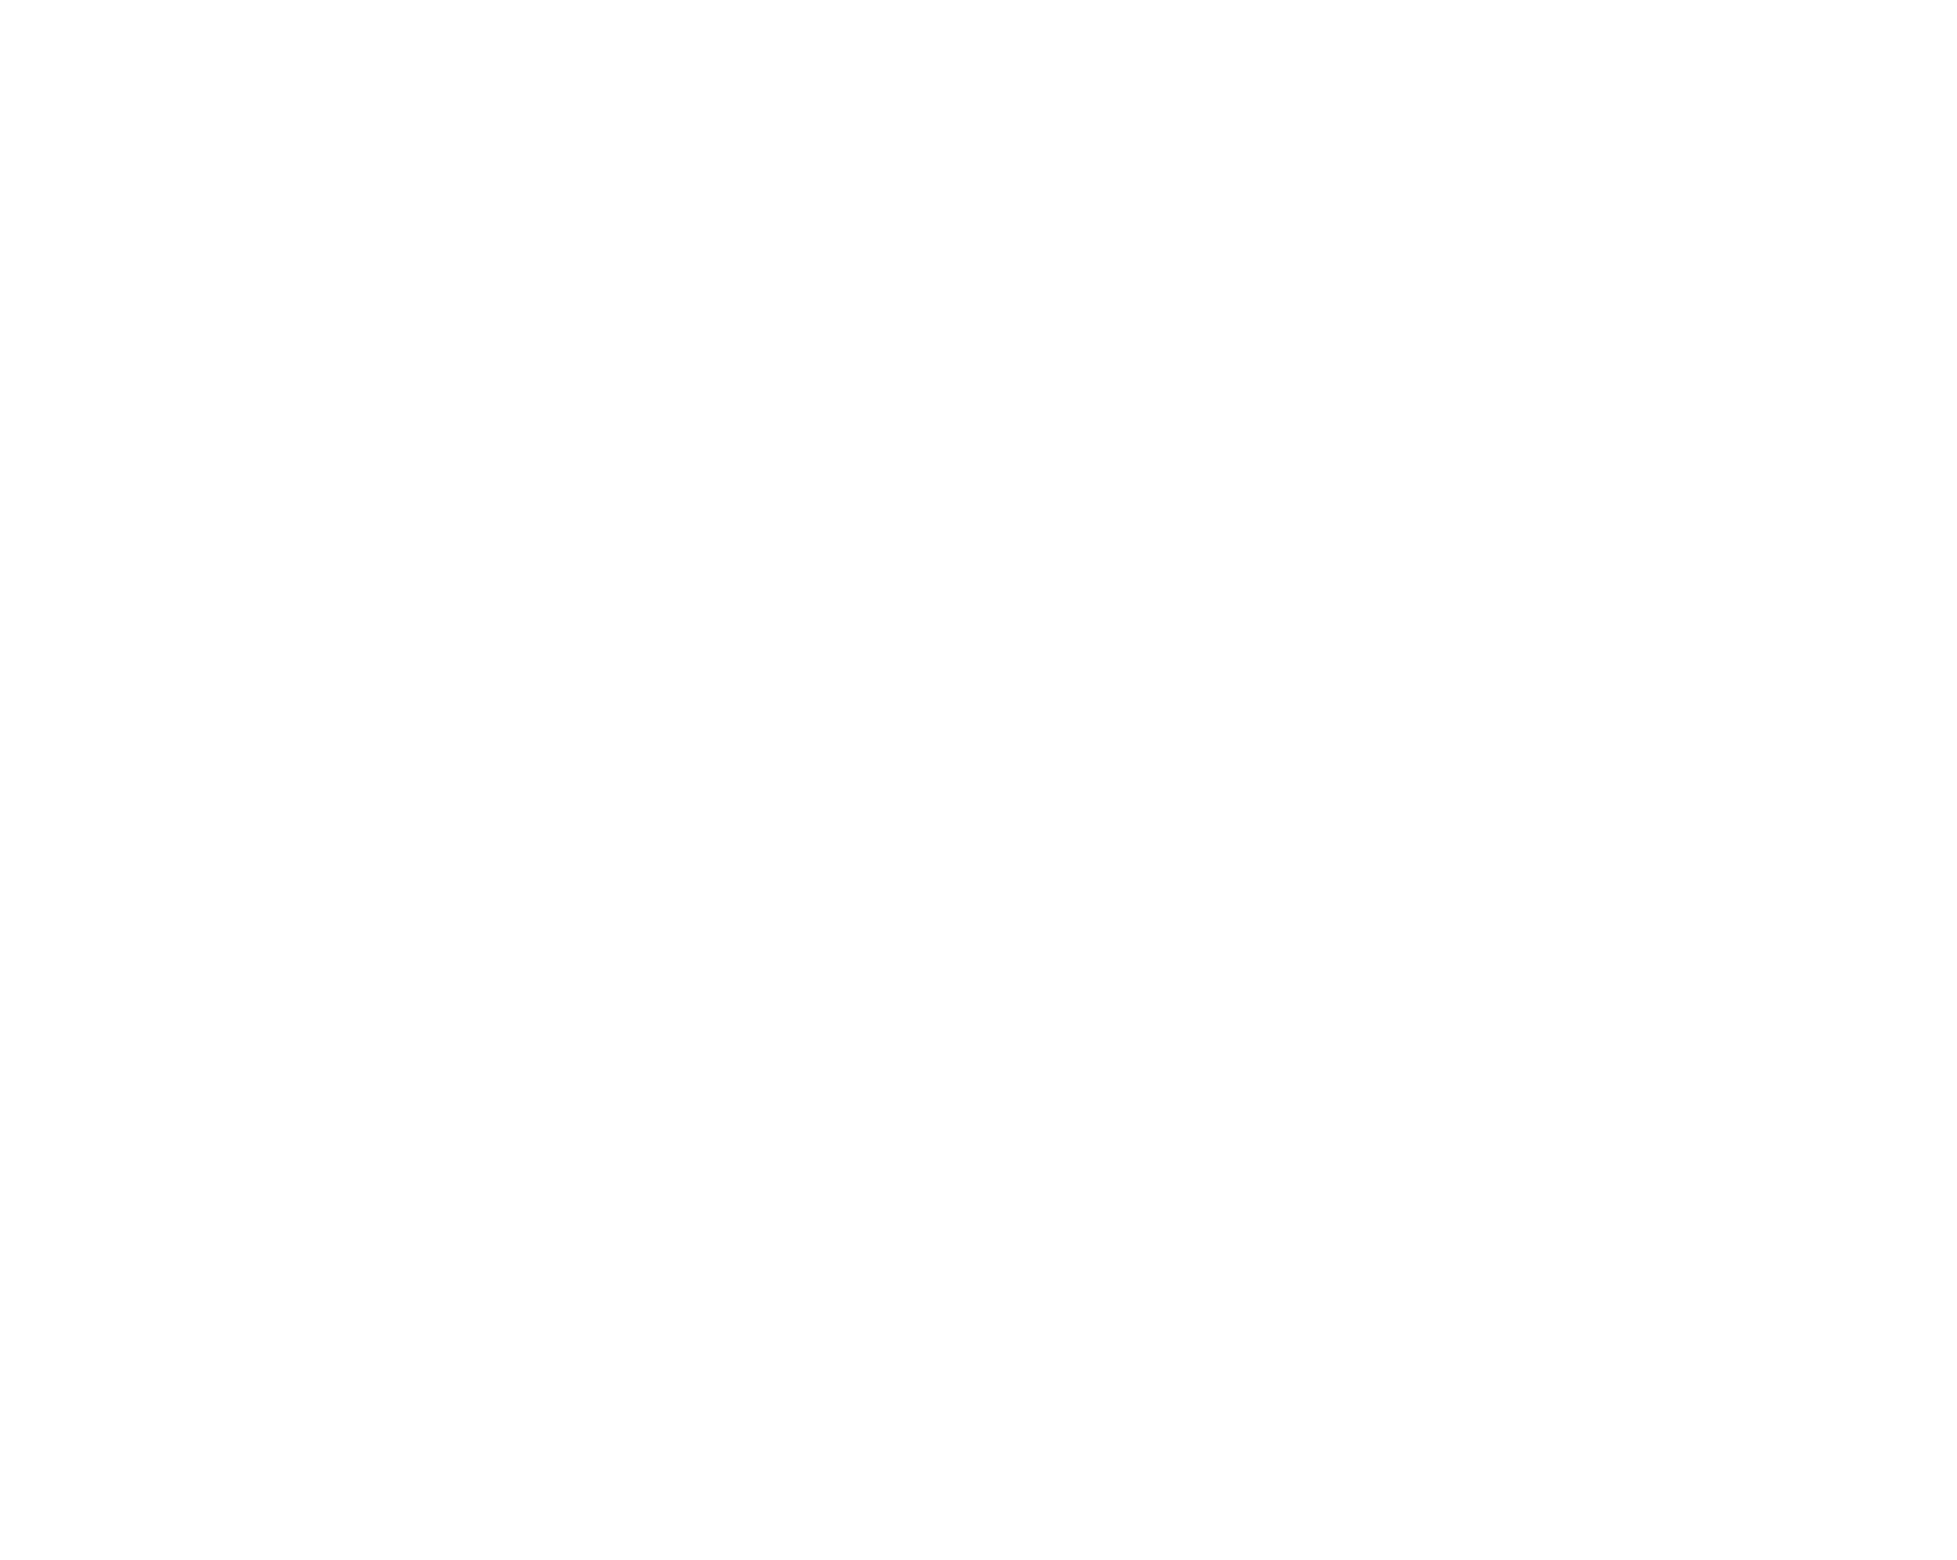

In [35]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

In [ ]:
# follow the first example on the tree to explain the decision_path function output
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
218,19.800,21.56,129.70,1230.0,0.09383,0.13060,0.127200,0.086910,0.2094,0.05581,...,25.73,28.64,170.30,2009.0,0.13530,0.32350,0.36170,0.18200,0.3070,0.08255
407,12.850,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.018670,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,10.92,26.29,68.81,366.1,0.13160,0.09473,0.02049,0.02381,0.1934,0.08988
134,18.450,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,0.05727,...,22.52,31.39,145.60,1590.0,0.14650,0.22750,0.39650,0.13790,0.3109,0.07610
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794


In [ ]:
clf.decision_path(X_test)

<188x11 sparse matrix of type '<class 'numpy.int64'>'
	with 582 stored elements in Compressed Sparse Row format>

In [ ]:
sparse = clf.decision_path(X_test).toarray()[:101]

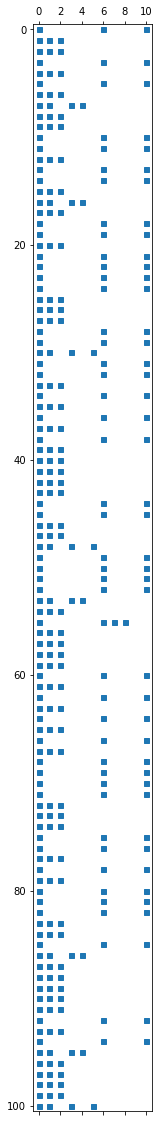

In [ ]:
plt.figure(figsize=(20, 20))
plt.spy(sparse, markersize=5)